In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase


states = pd.read_csv("states.csv")
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [3]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [4]:
states_2014=states.loc[states['YEAR'] == 2014]
states_2014.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
1122,Alabama,2014,740081.0,7357267,794090,4031547,2531630,7587737,3824295,2390530,587642.0,580934
1123,Alaska,2014,130539.0,2663647,309525,1824373,529749,2727056,1346457,982843,86314.0,269107
1124,Arizona,2014,943937.0,8361708,1102980,3182285,4076443,8109460,3902565,2858103,461316.0,678228
1125,Arkansas,2014,479881.0,5193218,552738,4006889,633591,5242672,2609867,1753929,282078.0,424314
1126,California,2014,6224685.0,72389126,7415061,38410554,26563511,72506810,35539425,21594573,3581789.0,6124103


In [5]:
states_2014.isna().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

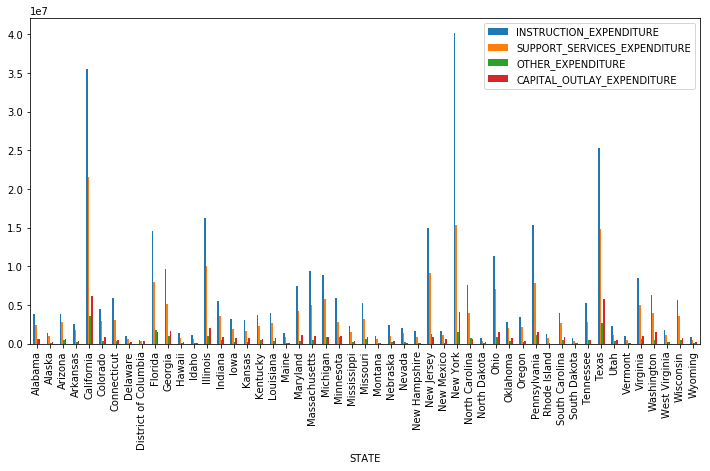

In [6]:
states_2014.plot(x="STATE", 
                 y=["INSTRUCTION_EXPENDITURE",
                    "SUPPORT_SERVICES_EXPENDITURE",
                    "OTHER_EXPENDITURE",
                    "CAPITAL_OUTLAY_EXPENDITURE"], 
                 kind="bar")



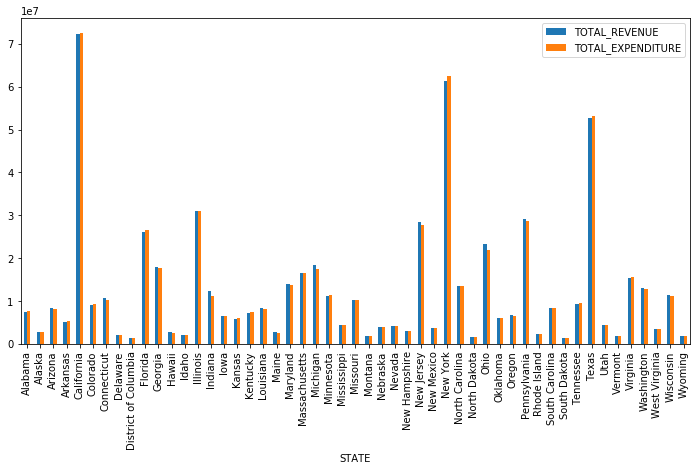

In [7]:
states_2014.plot(x="STATE", 
                 y=["TOTAL_REVENUE","TOTAL_EXPENDITURE"], 
                 kind="bar")


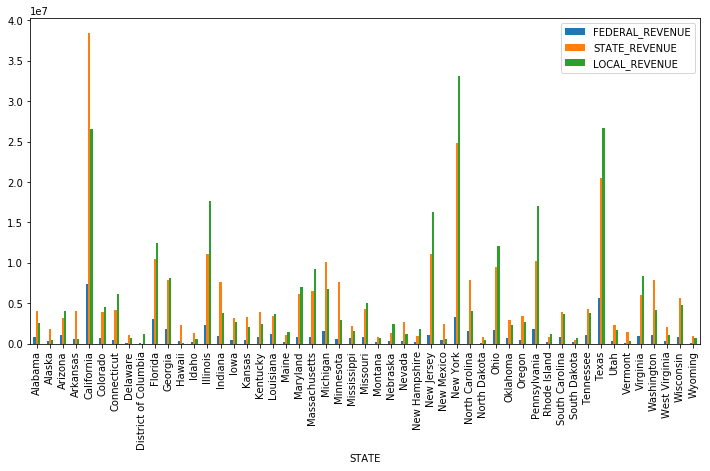

In [8]:
states_2014.plot(x="STATE", 
                 y=["FEDERAL_REVENUE",
                    "STATE_REVENUE",
                   "LOCAL_REVENUE"], 
                 kind="bar")


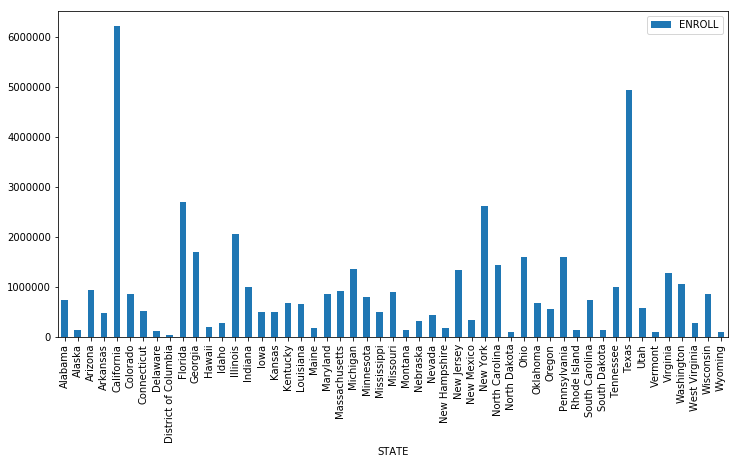

In [9]:
states_2014.plot(x="STATE", 
                 y=["ENROLL"], 
                 kind="bar")

In [10]:
std_states_2014 = states_2014.iloc[:,3:].div(states_2014.ENROLL, axis=0)
std_states_2014 = std_states_2014.join(states_2014['STATE'])
std_states_2014.head()

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,STATE
1122,9.941165,1.072977,5.447440,3.420747,10.252576,5.167401,3.230092,0.794024,0.784960,Alabama
1123,20.404990,2.371130,13.975693,4.058167,20.890738,10.314596,7.529114,0.661212,2.061507,Alaska
1124,8.858333,1.168489,3.371290,4.318554,8.591103,4.134349,3.027854,0.488715,0.718510,Arizona
1125,10.821887,1.151823,8.349755,1.320309,10.924942,5.438571,3.654925,0.587808,0.884207,Arkansas
1126,11.629364,1.191235,6.170682,4.267447,11.648270,5.709433,3.469183,0.575417,0.983841,California


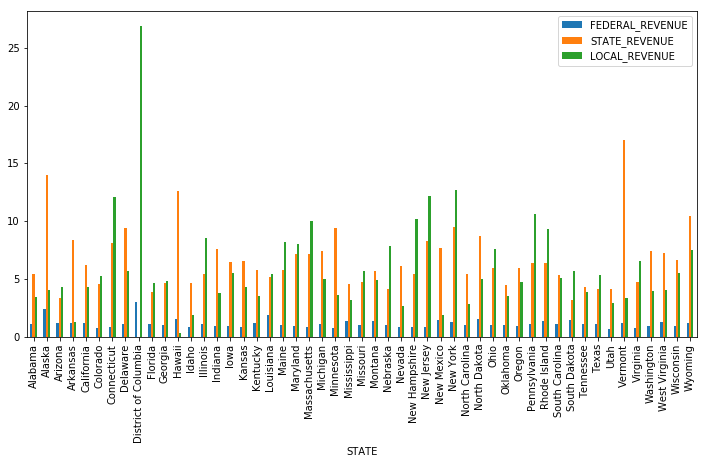

In [11]:

std_states_2014.plot(x="STATE", 
                 y=["FEDERAL_REVENUE",
                    "STATE_REVENUE",
                   "LOCAL_REVENUE"], 
                 kind="bar")


In [12]:
districts = pd.read_csv("districts.csv")
districts.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [13]:
districts_2014 = districts.loc[districts['YRDATA'] == 2014]
districts_2014_FL = districts_2014.loc[districts_2014['STATE']=='Florida']
districts_2014_FL.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
105390,Florida,28157.0,ALACHUA COUNTY SCHOOL DISTRICT,2014,261563,35659,112351,113553,264284,138860,97894,16780.0,8252
105391,Florida,4985.0,BAKER COUNTY SCHOOL DISTRICT,2014,42087,4717,28547,8823,43323,22759,16368,2708.0,1362
105392,Florida,27053.0,BAY COUNTY SCHOOL DISTRICT,2014,252199,25282,97040,129877,259493,141436,68325,15493.0,22523
105393,Florida,3239.0,BRADFORD COUNTY SCHOOL DISTRICT,2014,29924,4269,16591,9064,34741,16515,12127,3077.0,2993
105394,Florida,71232.0,BREVARD COUNTY SCHOOL DISTRICT,2014,633792,70079,312152,251561,621339,352403,194378,31880.0,20097


In [14]:
districts_2014_FL.isna().sum()

STATE       0
ENROLL      0
NAME        0
YRDATA      0
TOTALREV    0
TFEDREV     0
TSTREV      0
TLOCREV     0
TOTALEXP    0
TCURINST    0
TCURSSVC    0
TCURONON    0
TCAPOUT     0
dtype: int64

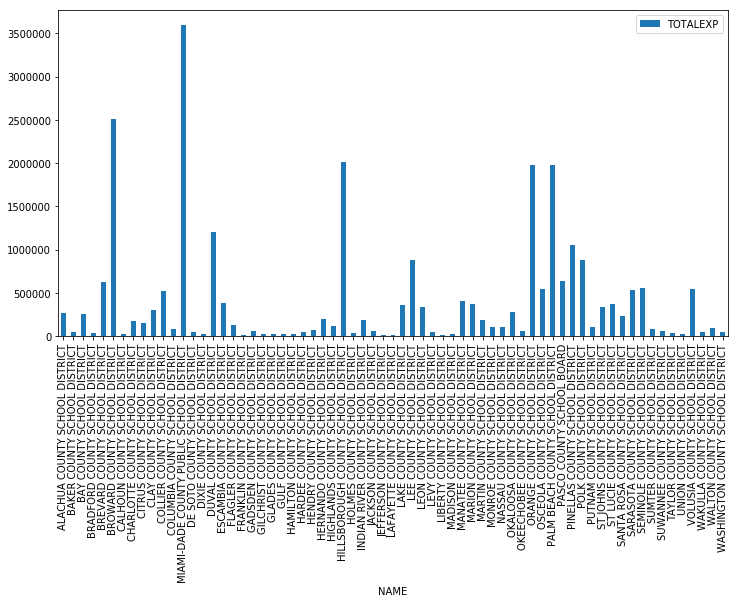

In [15]:
districts_2014_FL.plot(x="NAME", 
                 y=["TOTALEXP"], 
                 kind="bar")

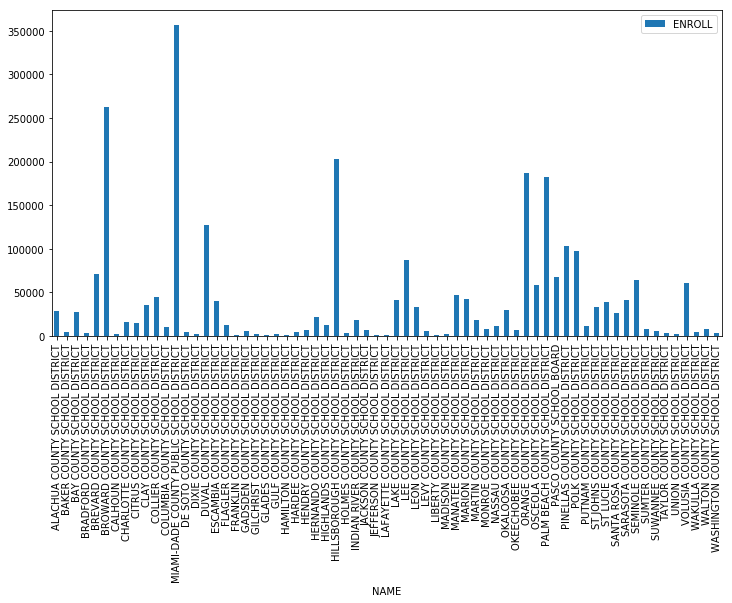

In [16]:
districts_2014_FL.plot(x="NAME", 
                 y=["ENROLL"], 
                 kind="bar")

In [17]:
std_districts_2014_FL = districts_2014_FL.iloc[:,4:].div(districts_2014_FL.ENROLL, axis=0)
std_districts_2014_FL = std_districts_2014_FL.join(districts_2014_FL['NAME'])
std_districts_2014_FL.head()

,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,NAME
105390,9.289448,1.266435,3.990162,4.032852,9.386085,4.931633,3.476720,0.595944,0.293071,ALACHUA COUNTY SCHOOL DISTRICT
105391,8.442728,0.946239,5.726580,1.769910,8.690672,4.565496,3.283450,0.543230,0.273220,BAKER COUNTY SCHOOL DISTRICT
105392,9.322404,0.934536,3.587033,4.800835,9.592023,5.228108,2.525598,0.572691,0.832551,BAY COUNTY SCHOOL DISTRICT
105393,9.238654,1.317999,5.122260,2.798395,10.725841,5.098796,3.744057,0.949985,0.924051,BRADFORD COUNTY SCHOOL DISTRICT
105394,8.897574,0.983813,4.382188,3.531573,8.722751,4.947257,2.728802,0.447552,0.282134,BREVARD COUNTY SCHOOL DISTRICT


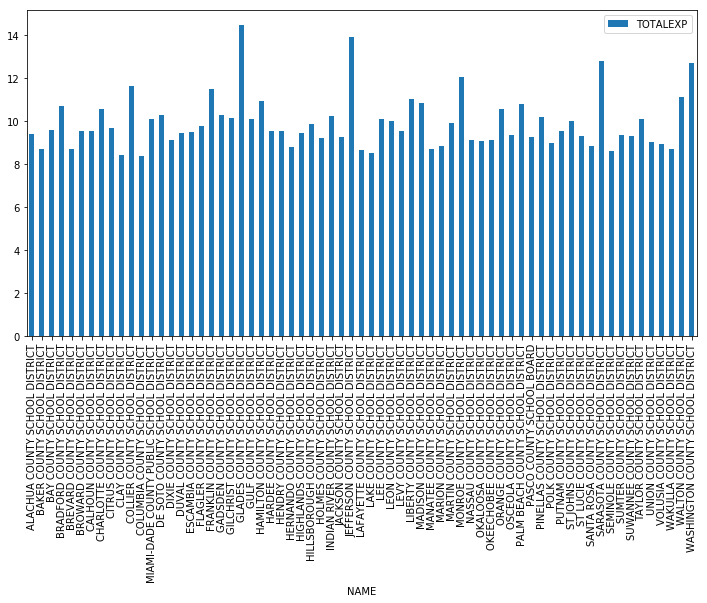

In [18]:
std_districts_2014_FL.plot(x="NAME", 
                 y=["TOTALEXP"], 
                 kind="bar")

Text(0.5,1,'Student Expenses per State')

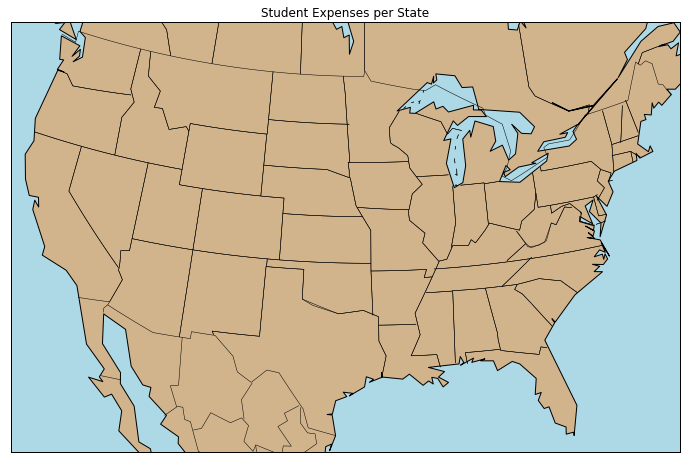

In [34]:
fig = plt.figure(num=None, figsize=(12, 8) )

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')

m.drawmapboundary(fill_color='lightblue')
m.drawcountries()
m.drawstates()
plt.title("Student Expenses per State")